In [69]:
import json
import matplotlib.pyplot as plt

In [2]:
def eda_corpus(corpus_path):
    f_corpus = open(corpus_path)
    corpus = json.load(f_corpus)
    # print('corpus: ', type(corpus))
    n_laws = len(corpus)
    print('n_laws: ', n_laws)

    n_articles_per_law = {}
    for law in corpus:
        n_articles = len(law['articles'])
        if n_articles not in n_articles_per_law.keys():
            n_articles_per_law[n_articles] = 1
        else:
            n_articles_per_law[n_articles] += 1
    print('n_articles_per_law: ', n_articles_per_law.keys())

In [3]:
eda_corpus('data/legal_corpus.json')

n_laws:  3271
n_articles_per_law:  dict_keys([17, 20, 41, 18, 8, 19, 5, 13, 14, 27, 28, 11, 1, 23, 7, 2, 21, 72, 10, 57, 39, 32, 16, 80, 6, 37, 15, 4, 12, 24, 44, 22, 3, 64, 47, 51, 31, 69, 33, 26, 50, 29, 9, 67, 30, 85, 35, 63, 62, 68, 34, 46, 38, 112, 43, 84, 25, 42, 79, 53, 59, 71, 49, 110, 74, 77, 40, 56, 500, 45, 48, 83, 95, 36, 116, 66, 121, 61, 54, 310, 89, 76, 102, 123, 73, 107, 96, 104, 52, 58, 86, 98, 128, 91, 70, 151, 260, 135, 60, 55, 206, 114, 87, 65, 82, 132, 181, 143, 134, 101, 88, 217, 97, 129, 100, 115, 172, 90, 92, 688, 371, 81])


In [70]:
########### EDA corpus ###############
f_corpus = open('data/legal_corpus.json')
corpus = json.load(f_corpus)

In [71]:
n_laws = len(corpus)
print('n_laws: ', n_laws)

n_laws:  3271


In [35]:
n_articles_per_law = {}
for law in corpus:
    n_articles = len(law['articles'])
    if n_articles not in n_articles_per_law.keys():
        n_articles_per_law[n_articles] = 1
    else:
        n_articles_per_law[n_articles] += 1

In [36]:
x, y = [], []
n_laws_check = 0
n_articles = 0
for key in sorted(n_articles_per_law.keys()):
    print(key, end = " ")
    n_articles += key * n_articles_per_law[key]
    x.append(str(key))
    y.append(n_articles_per_law[key])
    n_laws_check += n_articles_per_law[key]
print('n_laws_check: ', n_laws_check)
print('n_articles: ', n_articles)

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 76 77 79 80 81 82 83 84 85 86 87 88 89 90 91 92 95 96 97 98 100 101 102 104 107 110 112 114 115 116 121 123 128 129 132 134 135 143 151 172 181 206 217 260 310 371 500 688 n_laws_check:  3271
n_articles:  61425


<BarContainer object of 122 artists>

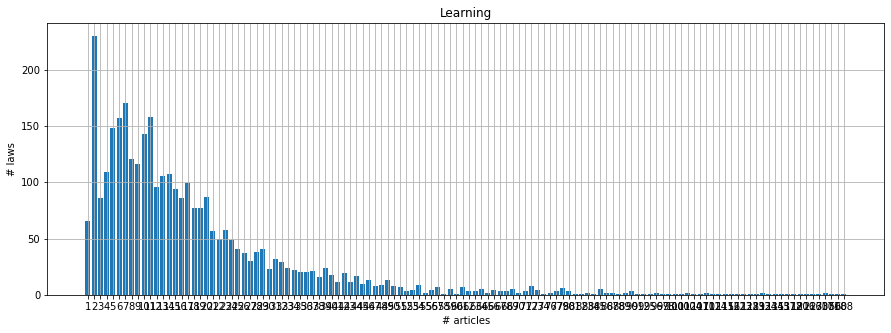

In [37]:
markersize=3
linewidth=1
plt.title('Learning')
plt.xlabel('# articles')
plt.ylabel('# laws')
#plt.xlim([0,])
# plt.ylim([0,120])
#plt.xticks(x,x)
plt.grid(True)
# plt.plot(x, y, '-ob', label='n_articles', linewidth=linewidth, markersize=markersize, markeredgecolor='k')
plt.bar(x,y)

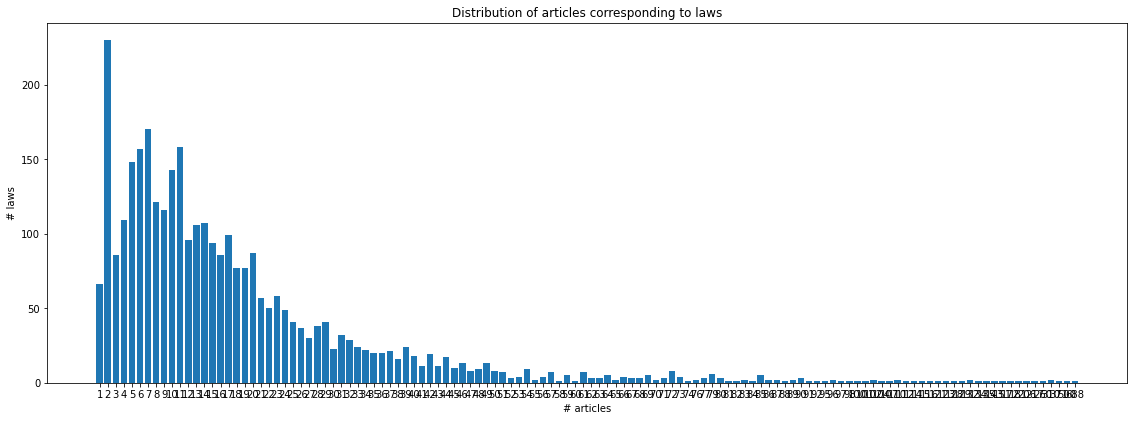

In [38]:
plt.rcParams['figure.figsize'] = [15, 5]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel('# laws')
ax.set_xlabel('# articles')
ax.set_title('Distribution of articles corresponding to laws')
ax.bar(x,y)
plt.show()

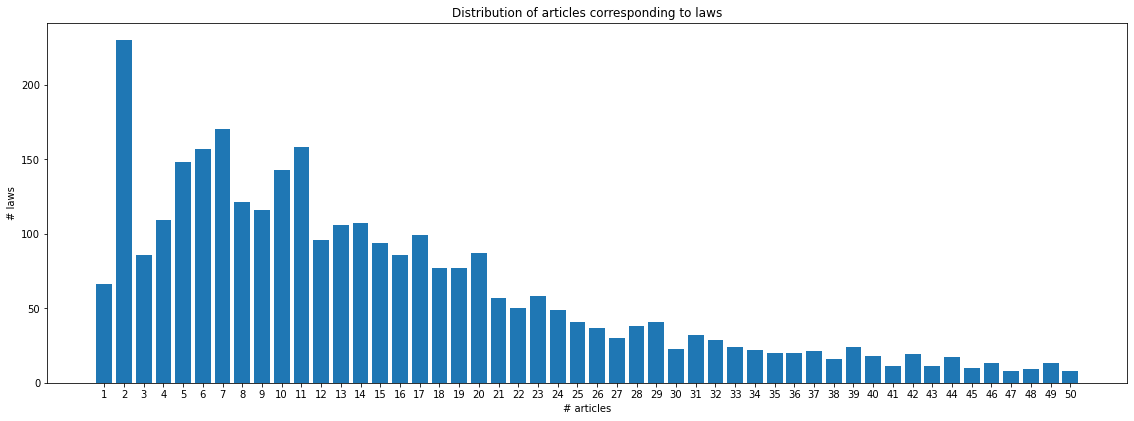

In [39]:
plt.rcParams['figure.figsize'] = [15, 5]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel('# laws')
ax.set_xlabel('# articles')
ax.set_title('Distribution of articles corresponding to laws')
ax.bar(x[:50],y[:50])
plt.show()

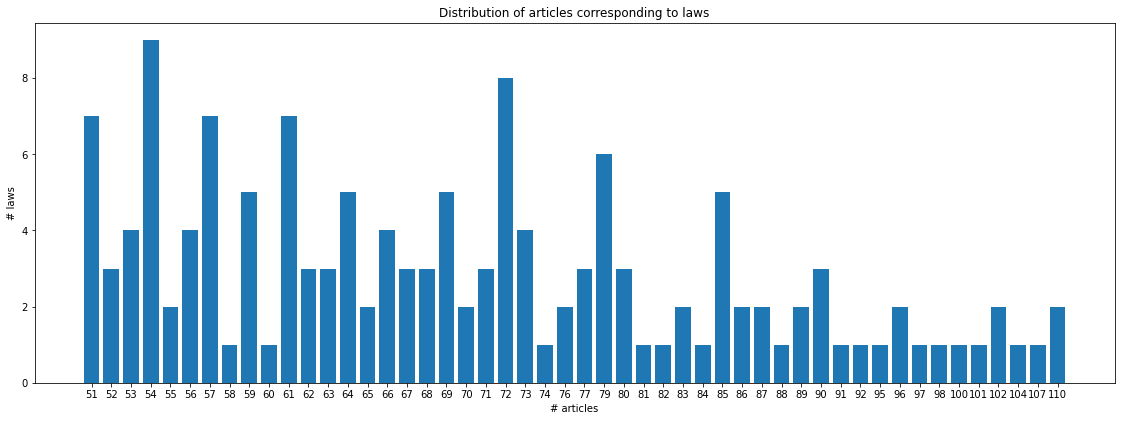

In [40]:
plt.rcParams['figure.figsize'] = [15, 5]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel('# laws')
ax.set_xlabel('# articles')
ax.set_title('Distribution of articles corresponding to laws')
ax.bar(x[50:100],y[50:100])
plt.show()

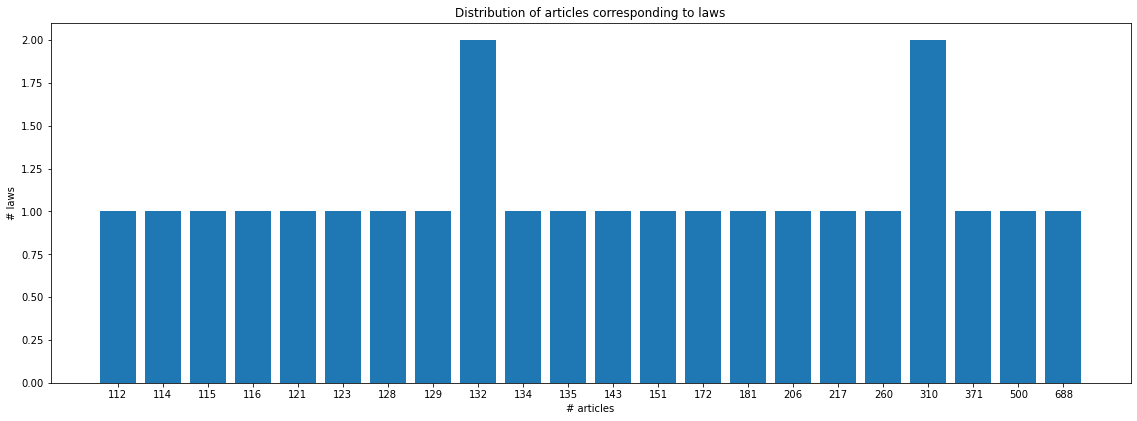

In [41]:
plt.rcParams['figure.figsize'] = [15, 5]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel('# laws')
ax.set_xlabel('# articles')
ax.set_title('Distribution of articles corresponding to laws')
ax.bar(x[100:],y[100:])
plt.show()

In [48]:
##### Articles analysis #####
from nltk.tokenize import RegexpTokenizer
tokenizer_regexp = RegexpTokenizer(r'\w+')
title_lens = {}
text_lens = {}
n_articles_check = 0
for law in corpus:
    articles = law['articles']
    for article in articles:
        title = article['title']
        title_len = len(tokenizer_regexp.tokenize(title))
        if title_len not in title_lens.keys():
            title_lens[title_len] = 1
        else:
            title_lens[title_len] += 1
            
        text = article['text']
        text_len = len(tokenizer_regexp.tokenize(text))
        if text_len not in text_lens.keys():
            text_lens[text_len] = 1
        else:
            text_lens[text_len] += 1
            
        n_articles_check += 1
print(title_lens.keys())
print(text_lens.keys())
print(n_articles_check)

dict_keys([6, 16, 12, 8, 14, 9, 11, 15, 13, 25, 35, 20, 18, 21, 27, 5, 19, 10, 33, 34, 37, 51, 29, 43, 45, 17, 7, 3, 4, 2, 44, 24, 26, 22, 30, 38, 32, 23, 46, 40, 31, 50, 36, 39, 49, 28, 42, 62, 84, 63, 64, 52, 48, 60, 78, 126, 53, 55, 41, 54, 57, 56, 47, 66, 97, 59, 79, 90, 109, 95, 87, 81, 85, 65, 69, 72, 68, 107, 327, 67, 71, 58, 108, 61, 74, 88, 102, 106, 86, 116, 70, 82, 75, 96, 121, 77, 91, 127, 114, 76, 111, 123, 98, 92, 120, 104, 398, 80, 101, 148, 115, 331, 83, 99, 73, 100])
dict_keys([37, 199, 57, 212, 38, 529, 196, 242, 485, 131, 368, 235, 101, 143, 72, 179, 70, 127, 128, 173, 220, 46, 298, 69, 562, 116, 456, 104, 550, 200, 108, 647, 228, 147, 61, 157, 205, 87, 288, 115, 90, 409, 316, 217, 34, 25, 23, 111, 793, 47, 120, 356, 64, 189, 78, 151, 91, 152, 107, 122, 167, 264, 130, 301, 82, 155, 55, 349, 106, 170, 271, 515, 238, 460, 45, 77, 223, 59, 211, 237, 135, 168, 36, 51, 132, 453, 188, 839, 256, 137, 305, 265, 89, 281, 66, 63, 84, 121, 259, 81, 767, 145, 110, 31, 239, 219, 

In [68]:
x, y = [], []
n_articles_check = 0
predominant_title_len_key = -1
predominant_title_len = -1
for key in sorted(title_lens.keys()):
    print(key, end = " ")
    x.append(str(key))
    y.append(title_lens[key])
    n_articles_check += title_lens[key]
    if title_lens[key] > predominant_title_len:
        predominant_title_len_key = key
        predominant_title_len = title_lens[key]
print(n_articles_check)
print('predominant_title_len_key: ', predominant_title_len_key)
print('predominant_title_len: ', predominant_title_len)

2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 90 91 92 95 96 97 98 99 100 101 102 104 106 107 108 109 111 114 115 116 120 121 123 126 127 148 327 331 398 61425
predominant_title_len_key:  6
predominant_title_len:  11070


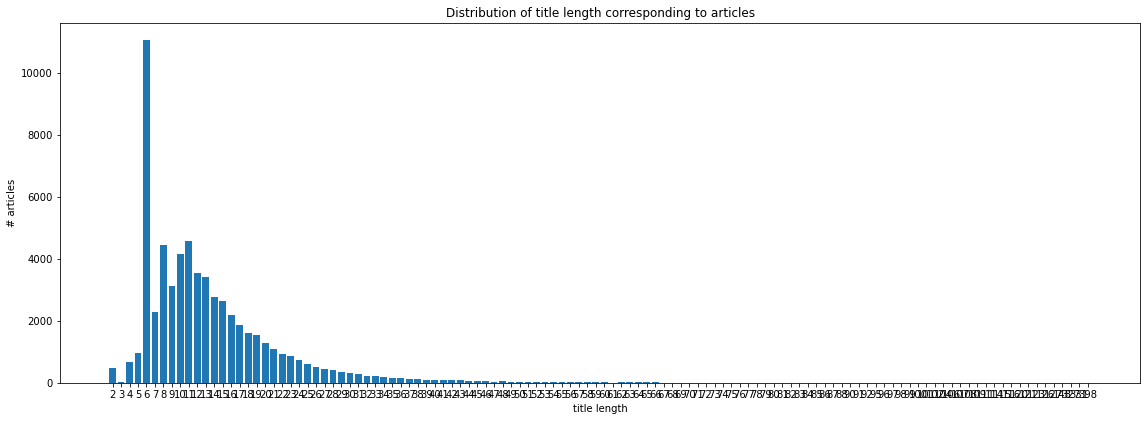

In [44]:
plt.rcParams['figure.figsize'] = [15, 5]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel('title length')
ax.set_ylabel('# articles')
ax.set_title('Distribution of title length corresponding to articles')
ax.bar(x,y)
plt.show()

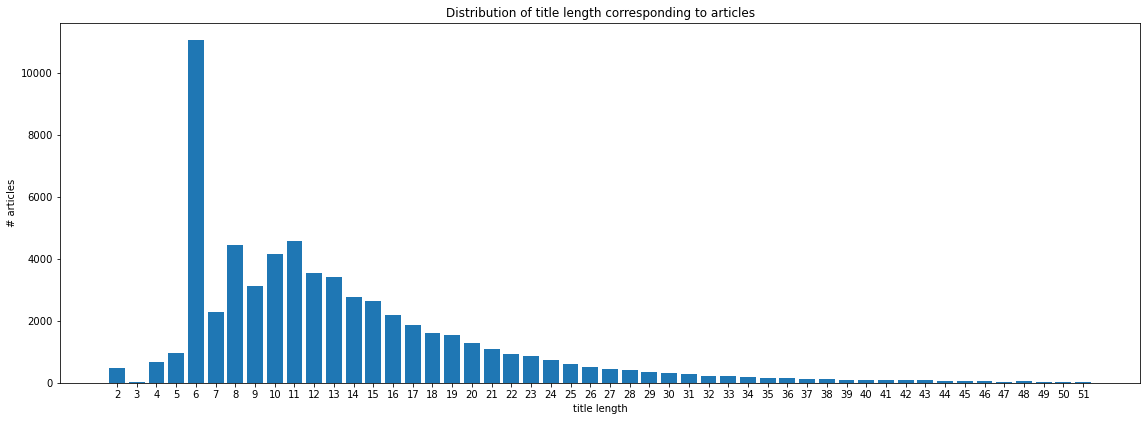

In [45]:
plt.rcParams['figure.figsize'] = [15, 5]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel('title length')
ax.set_ylabel('# articles')
ax.set_title('Distribution of title length corresponding to articles')
ax.bar(x[:50],y[:50])
plt.show()

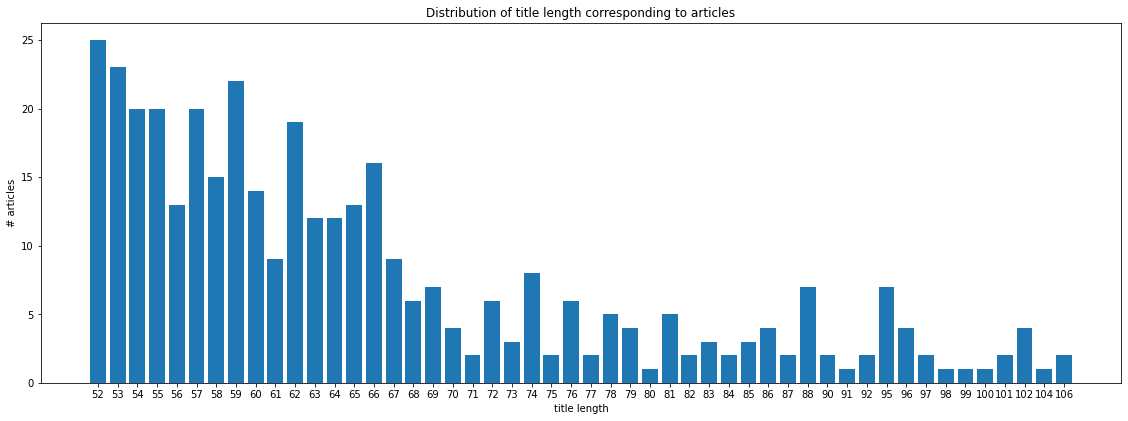

In [46]:
plt.rcParams['figure.figsize'] = [15, 5]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel('title length')
ax.set_ylabel('# articles')
ax.set_title('Distribution of title length corresponding to articles')
ax.bar(x[50:100],y[50:100])
plt.show()

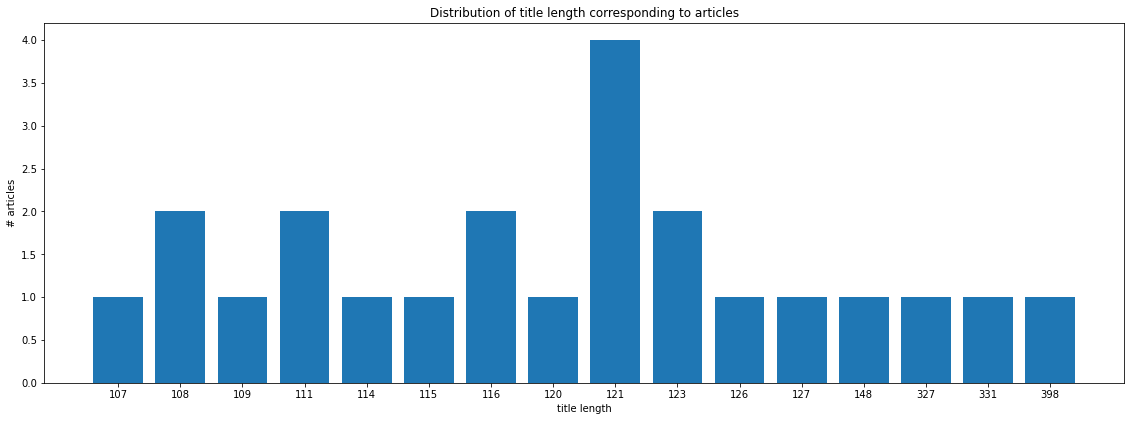

In [47]:
plt.rcParams['figure.figsize'] = [15, 5]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel('title length')
ax.set_ylabel('# articles')
ax.set_title('Distribution of title length corresponding to articles')
ax.bar(x[100:],y[100:])
plt.show()

In [51]:
x, y = [], []
n_articles_check = 0
predominant_text_len_key = -1
predominant_text_len = -1
for key in sorted(text_lens.keys()):
    print(key, end = " ")
    x.append(str(key))
    y.append(text_lens[key])
    n_articles_check += text_lens[key]
    if text_lens[key] > predominant_text_len:
        predominant_text_len_key = key
        predominant_text_len = text_lens[key]
print(n_articles_check)
print('predominant_text_len_key: ', predominant_text_len_key)
print('predominant_text_len: ', predominant_text_len)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 27

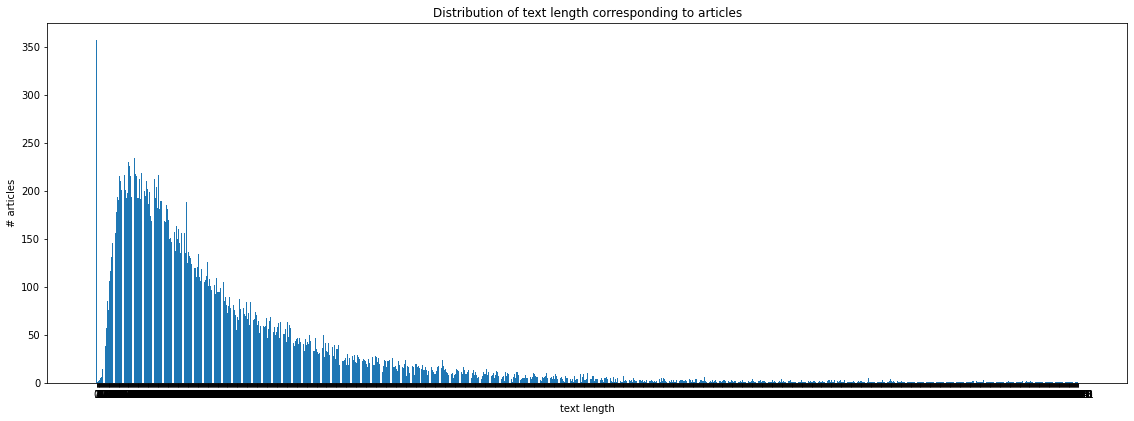

In [52]:
plt.rcParams['figure.figsize'] = [15, 5]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel('text length')
ax.set_ylabel('# articles')
ax.set_title('Distribution of text length corresponding to articles')
ax.bar(x,y)
plt.show()

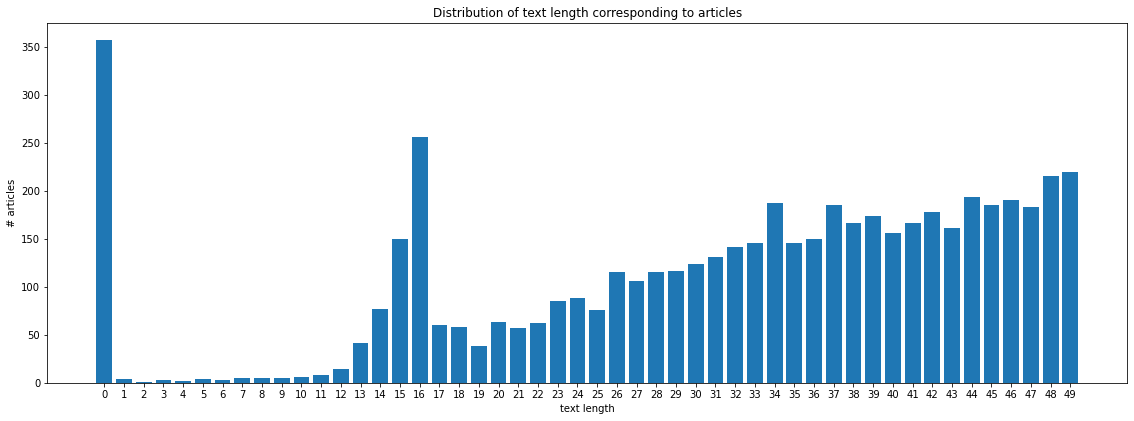

In [53]:
plt.rcParams['figure.figsize'] = [15, 5]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel('text length')
ax.set_ylabel('# articles')
ax.set_title('Distribution of text length corresponding to articles')
ax.bar(x[:50],y[:50])
plt.show()

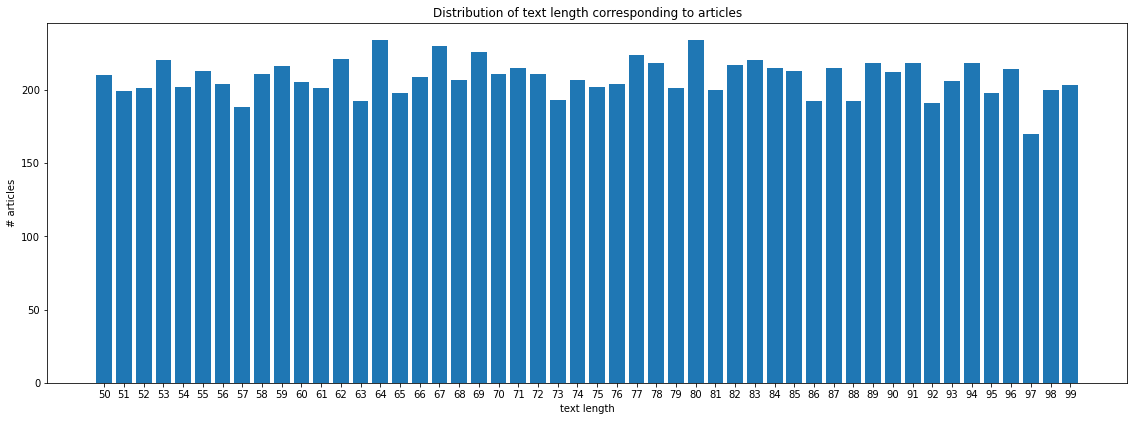

In [54]:
plt.rcParams['figure.figsize'] = [15, 5]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel('text length')
ax.set_ylabel('# articles')
ax.set_title('Distribution of text length corresponding to articles')
ax.bar(x[50:100],y[50:100])
plt.show()

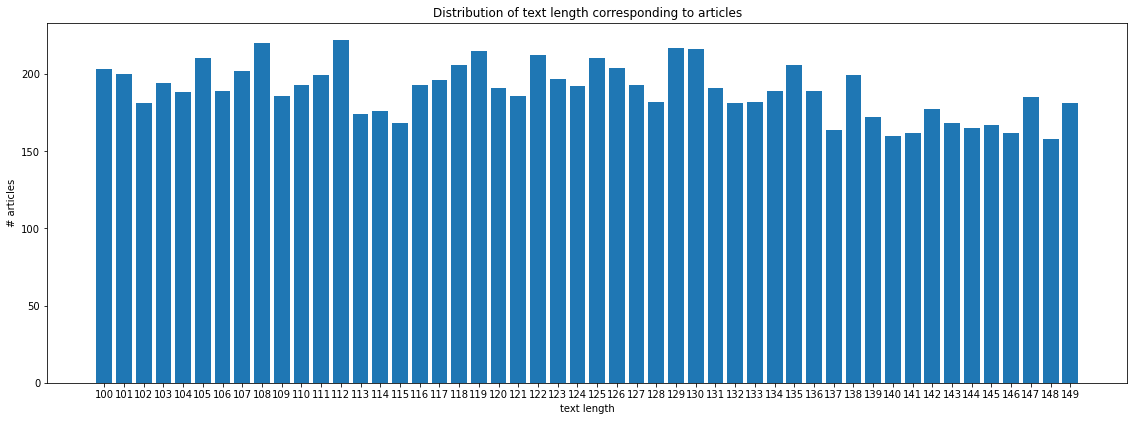

In [55]:
plt.rcParams['figure.figsize'] = [15, 5]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel('text length')
ax.set_ylabel('# articles')
ax.set_title('Distribution of text length corresponding to articles')
ax.bar(x[100:150],y[100:150])
plt.show()

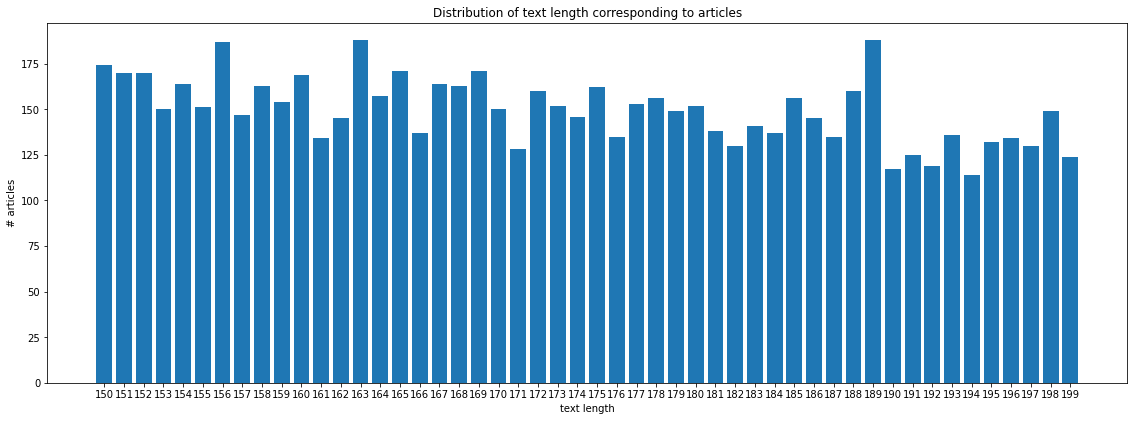

In [56]:
plt.rcParams['figure.figsize'] = [15, 5]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel('text length')
ax.set_ylabel('# articles')
ax.set_title('Distribution of text length corresponding to articles')
ax.bar(x[150:200],y[150:200])
plt.show()

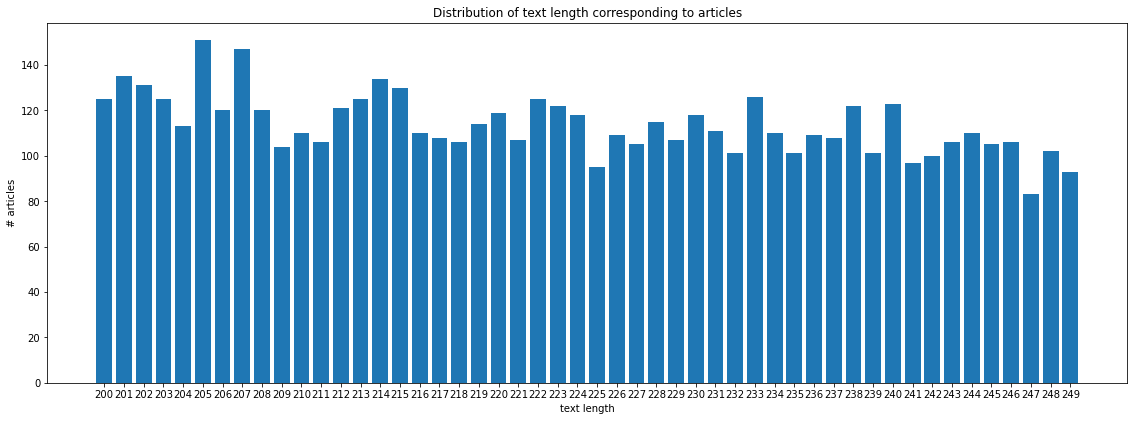

In [57]:
plt.rcParams['figure.figsize'] = [15, 5]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel('text length')
ax.set_ylabel('# articles')
ax.set_title('Distribution of text length corresponding to articles')
ax.bar(x[200:250],y[200:250])
plt.show()

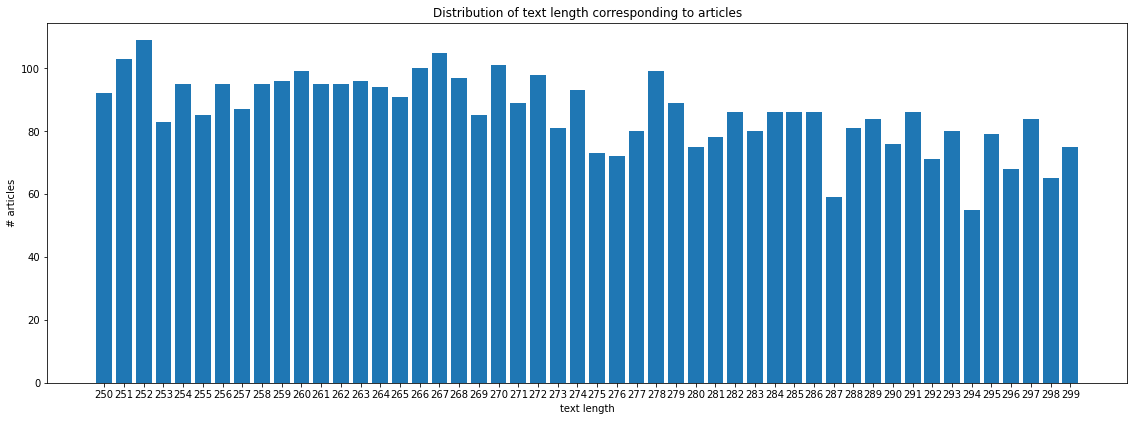

In [58]:
plt.rcParams['figure.figsize'] = [15, 5]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel('text length')
ax.set_ylabel('# articles')
ax.set_title('Distribution of text length corresponding to articles')
ax.bar(x[250:300],y[250:300])
plt.show()

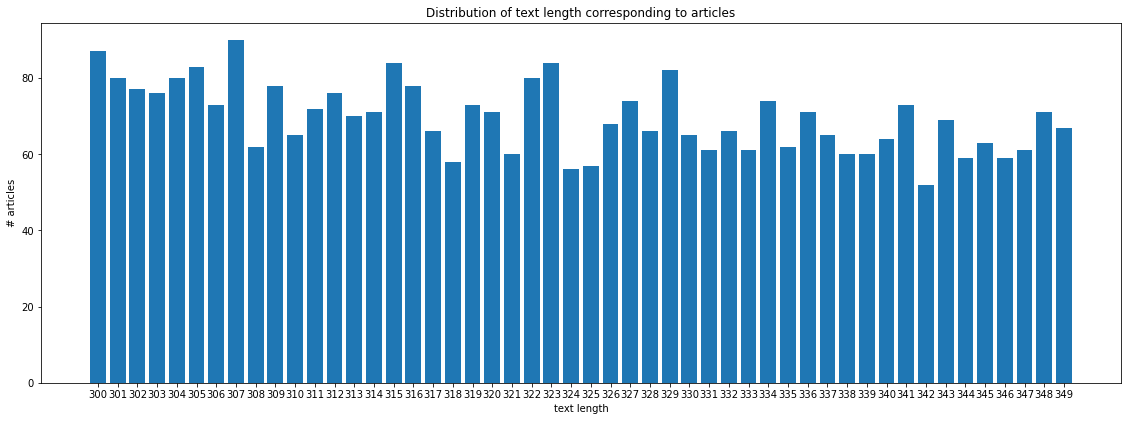

In [59]:
plt.rcParams['figure.figsize'] = [15, 5]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel('text length')
ax.set_ylabel('# articles')
ax.set_title('Distribution of text length corresponding to articles')
ax.bar(x[300:350],y[300:350])
plt.show()

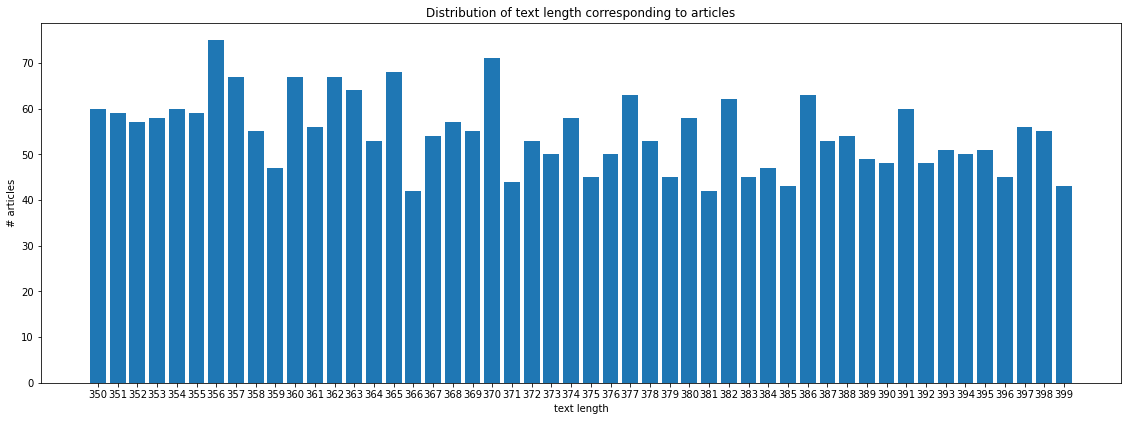

In [60]:
plt.rcParams['figure.figsize'] = [15, 5]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel('text length')
ax.set_ylabel('# articles')
ax.set_title('Distribution of text length corresponding to articles')
ax.bar(x[350:400],y[350:400])
plt.show()

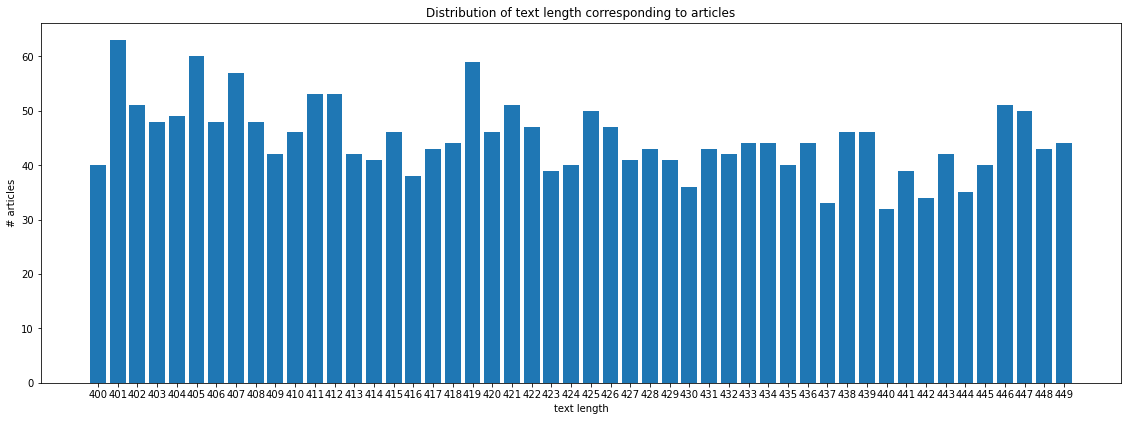

In [61]:
plt.rcParams['figure.figsize'] = [15, 5]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel('text length')
ax.set_ylabel('# articles')
ax.set_title('Distribution of text length corresponding to articles')
ax.bar(x[400:450],y[400:450])
plt.show()

In [62]:
print(len(x))

2063


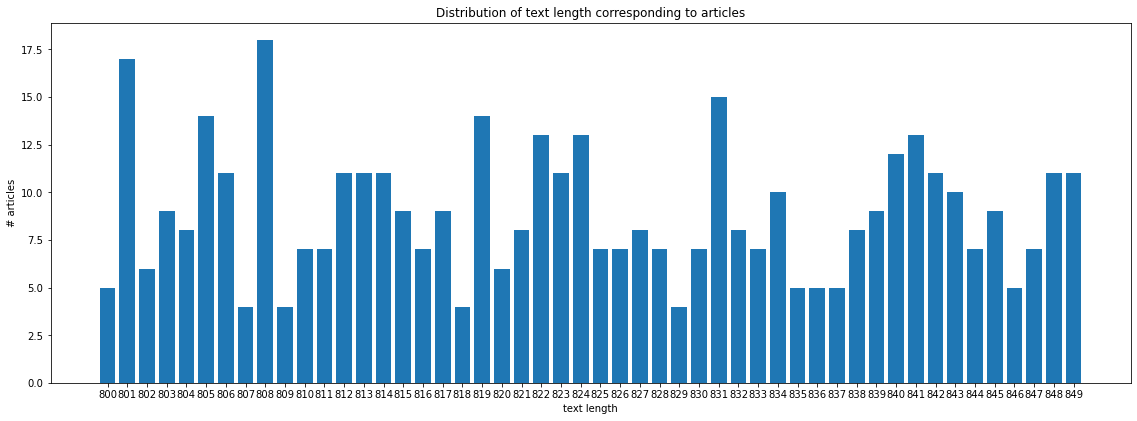

In [63]:
plt.rcParams['figure.figsize'] = [15, 5]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel('text length')
ax.set_ylabel('# articles')
ax.set_title('Distribution of text length corresponding to articles')
ax.bar(x[800:850],y[800:850])
plt.show()

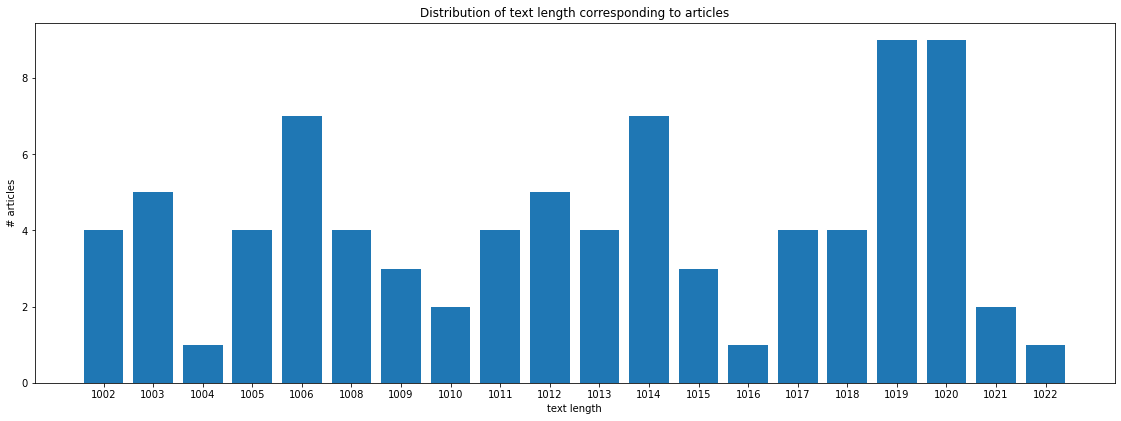

In [67]:
plt.rcParams['figure.figsize'] = [15, 5]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel('text length')
ax.set_ylabel('# articles')
ax.set_title('Distribution of text length corresponding to articles')
ax.bar(x[1000:1020],y[1000:1020])
plt.show()

In [96]:
##### Articles analysis with percentage #####
from nltk.tokenize import RegexpTokenizer
tokenizer_regexp = RegexpTokenizer(r'\w+')

title_lens = [{'min': 1, 'max': 50, 'count': 0}, 
              {'min': 51, 'max': 100, 'count': 0}, 
              {'min': 101, 'max': 5000, 'count': 0}]
text_lens = [{'min': 0, 'max': 0, 'count': 0},
            {'min': 1, 'max': 200, 'count': 0},
            {'min': 201, 'max': 400, 'count': 0},
            {'min': 401, 'max': 1000, 'count': 0},
            {'min': 1001, 'max': 2000, 'count': 0},
            {'min': 2001, 'max': 5000, 'count': 0},
            {'min': 5001, 'max': 100000, 'count': 0}]

title_lens_pie = [{'min': 1, 'max': 50, 'count': 0}, 
              {'min': 51, 'max': 5000, 'count': 0}]
text_lens_pie = [{'min': 0, 'max': 200, 'count': 0},
            {'min': 201, 'max': 400, 'count': 0},
            {'min': 401, 'max': 1000, 'count': 0},
            {'min': 1001, 'max': 100000, 'count': 0}]
n_articles = 0
for law in corpus:
    articles = law['articles']
    for article in articles:
        n_articles += 1
        title = article['title']
        title_len = len(tokenizer_regexp.tokenize(title))
        text = article['text']
        text_len = len(tokenizer_regexp.tokenize(text))
        
        for item in title_lens:
            if title_len >= item['min'] and title_len <= item['max']:
                item['count'] += 1
                break
        
        for item in text_lens:
            if text_len >= item['min'] and text_len <= item['max']:
                item['count'] += 1
                break
                
        for item in title_lens_pie:
            if title_len >= item['min'] and title_len <= item['max']:
                item['count'] += 1
                break
        
        for item in text_lens_pie:
            if text_len >= item['min'] and text_len <= item['max']:
                item['count'] += 1
                break

print('n_articles: ', n_articles)
print('title_lens: ', title_lens)
print('text_lens: ', text_lens)
print('title_lens_pie: ', title_lens_pie)
print('text_lens_pie: ', text_lens_pie)

n_articles:  61425
title_lens:  [{'min': 1, 'max': 50, 'count': 61007}, {'min': 51, 'max': 100, 'count': 386}, {'min': 101, 'max': 5000, 'count': 32}]
text_lens:  [{'min': 0, 'max': 0, 'count': 357}, {'min': 1, 'max': 200, 'count': 32519}, {'min': 201, 'max': 400, 'count': 16131}, {'min': 401, 'max': 1000, 'count': 10477}, {'min': 1001, 'max': 2000, 'count': 1537}, {'min': 2001, 'max': 5000, 'count': 350}, {'min': 5001, 'max': 100000, 'count': 54}]
title_lens_pie:  [{'min': 1, 'max': 50, 'count': 61007}, {'min': 51, 'max': 5000, 'count': 418}]
text_lens_pie:  [{'min': 0, 'max': 200, 'count': 32876}, {'min': 201, 'max': 400, 'count': 16131}, {'min': 401, 'max': 1000, 'count': 10477}, {'min': 1001, 'max': 100000, 'count': 1941}]


In [98]:
for item in title_lens_pie:
    item['percentage'] = item['count'] * 100 / n_articles
for item in text_lens_pie:
    item['percentage'] = item['count'] * 100 / n_articles
print('title_lens_pie: ', title_lens_pie)
print('text_lens_pie: ', text_lens_pie)

title_lens_pie:  [{'min': 1, 'max': 50, 'count': 61007, 'percentage': 99.31949531949532}, {'min': 51, 'max': 5000, 'count': 418, 'percentage': 0.6805046805046805}]
text_lens_pie:  [{'min': 0, 'max': 200, 'count': 32876, 'percentage': 53.52218152218152}, {'min': 201, 'max': 400, 'count': 16131, 'percentage': 26.26129426129426}, {'min': 401, 'max': 1000, 'count': 10477, 'percentage': 17.056573056573058}, {'min': 1001, 'max': 100000, 'count': 1941, 'percentage': 3.15995115995116}]


In [99]:
# Draw column chart for title length
def draw_bar_chart(items, xlabel, ylabel, name):
    x, y = [], []
    for item in items:
        x.append(str(item['min']) + '-' + str(item['max']))
        y.append(item['count'])
    plt.rcParams['figure.figsize'] = [15, 5]
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(name)
    rects = ax.bar(x, y)
    for idx, rect in enumerate(rects):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.01*height,
                '%d' % items[idx]['count'],
                ha='center', va='bottom')
    plt.show()

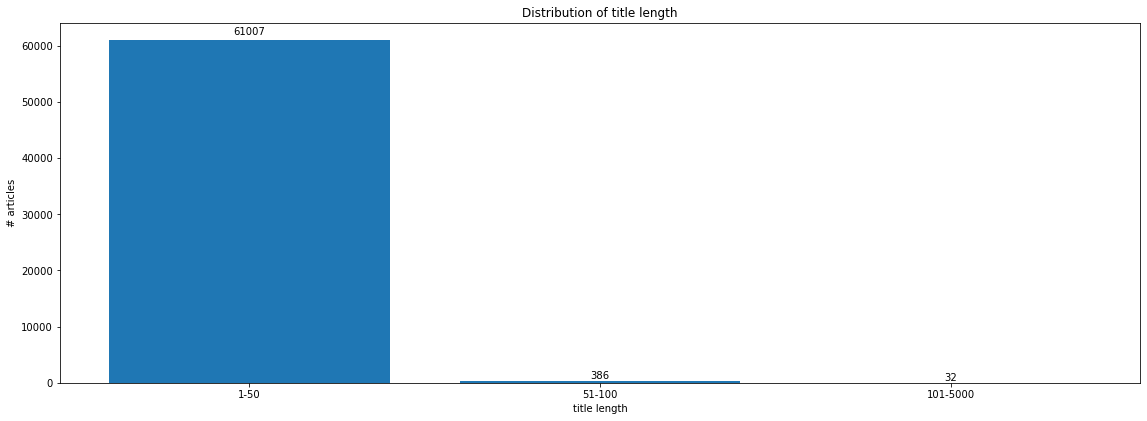

In [100]:
draw_bar_chart(title_lens, 'title length', '# articles', 'Distribution of title length')

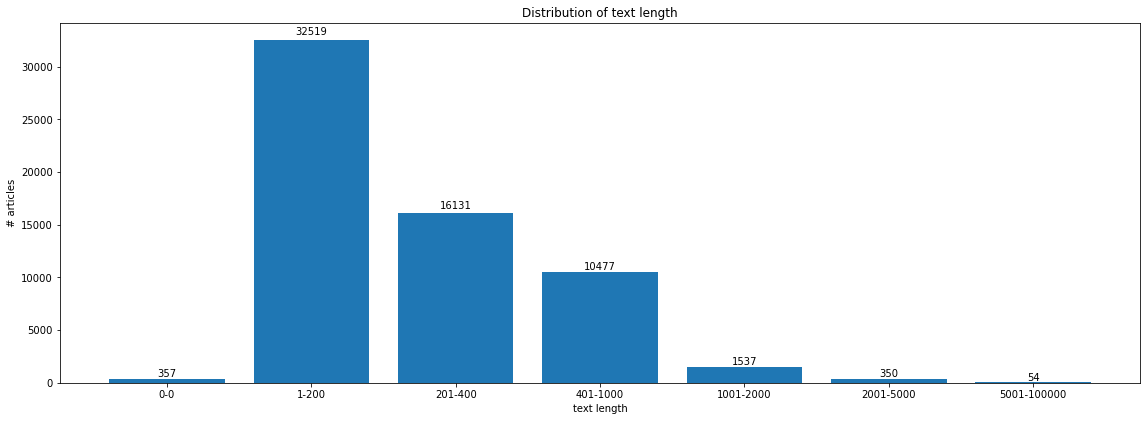

In [101]:
draw_bar_chart(text_lens, 'text length', '# articles', 'Distribution of text length')

In [102]:
def draw_pie_chart(items):
    x, y, explode = [], [], []
    for item in items:
        x.append(str(item['min']) + '-' + str(item['max']))
        y.append(item['percentage'])
        explode.append(0)
    plt.rcParams['figure.figsize'] = [15, 5]
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
#     ax.set_xlabel(xlabel)
#     ax.set_ylabel(ylabel)
#     ax.set_title(name)
#     rects = ax.bar(x, y)
#     for idx, rect in enumerate(rects):
#         height = rect.get_height()
#         ax.text(rect.get_x() + rect.get_width()/2., 1.01*height,
#                 '%d' % items[idx]['count'],
#                 ha='center', va='bottom')

    ax.pie(y, explode=tuple(explode), labels=x, autopct='%1.1f%%',
        shadow=True, startangle=90)
    plt.show()

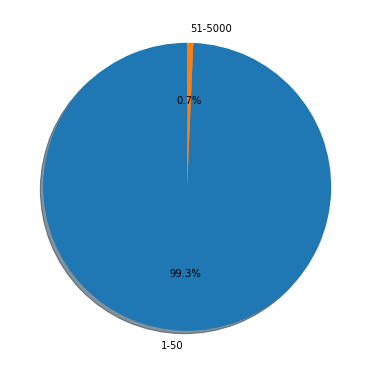

In [104]:
draw_pie_chart(title_lens_pie)

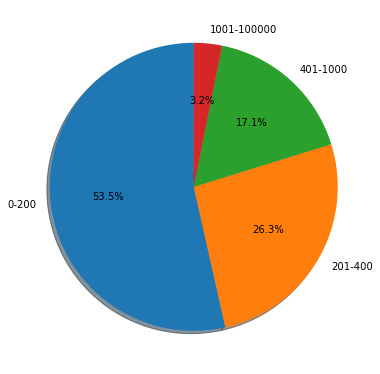

In [105]:
draw_pie_chart(text_lens_pie)